<a href="https://colab.research.google.com/github/partha-pkp/OC_miRNA/blob/main/miRNA_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have the following miRNA-sequencing datasets:

blood_oc_merged_raw_summed.rds:
1. healthy controls
2. ovarian cancer patients - different stages (i.e. I/II and III/IV) and tumor types (i.e. serous and clear cell)

batch4_raw_summed.rds:
1. healthy controls
2. patients at high risk (HR) for developing ovarian cancer (based on either family history or BRCA mutation)

Here, we build a model using the healthy controls and ovarian cancer samples from the 1st dataset and healthy controls from the 2nd dataset.

In [1]:
#Load in file with necessary functions/packages
source("miRNAFunctions.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'miRNAFunctions.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


# 1. Subset data

In [ ]:
#Subset the 1st dataset to only the samples we want

#Load in the raw miRNA-seq data
df = readRDS("blood_oc_merged_raw_summed.rds")

#Load in the labels for the samples
#The "Run" column corresponds to the columns in the previous
ann_df = readRDS("blood_oc_full_ann.rds") %>% filter(Run %in% colnames(df))

#Get the IDs for the samples we want
#In this case, we only want the Stage I/II and Stage III/IV serous adenocarcinoma samples from the PMP dataset
#and healthy samples from the NECC dataset
pmp_samples = ann_df %>%
    filter(batch=="PMP" & ((Histology=="Serous" & (STAGE=="Stage I/II" | STAGE=="Stage III/IV")))) %>%
    pull(Run)
healthy_samples = ann_df %>% filter(batch=="NECC") %>% pull(Run)
samples = c(pmp_samples, healthy_samples)

#Subset the miRNA seq columns to only the samples we want, and save it as an RDS file
df = df %>% select(one_of(samples))
saveRDS(df, "I_IV_serous_raw.rds")

In [ ]:
#Subset the 2nd dataset to only samples we want

#Load in file with sample metadata
batch4_summary = data.table::fread("batch4_summary.csv")
#Load in sample labels
ann = readRDS("/xdisk/guangyao/michellewei/b1_b4_counts_ann/b1b4_ann_with_brca.rds") %>%
    select(sample_id, brca_status)
#Get top 10 highest seq-depth samples for healthy controls
lr_samples = inner_join(batch4_summary, ann, by="sample_id") %>%
    filter(Condition=="LR") %>%
    arrange(desc(R1_sum)) %>%
    pull(sample_id)
lr_samples = lr_samples[1:10]
#Get top 10 highest seq-depth samples for high risk (based on BRCA)
hr_samples = inner_join(batch4_summary, ann, by="sample_id") %>%
    filter(brca_status=="BRCA") %>%
    arrange(desc(R1_sum)) %>%
    pull(sample_id)
hr_samples = hr_samples[1:10]
#Get top 10 highest seq-depth samples for high risk (based on family history)
fh_samples = inner_join(batch4_summary, ann, by="sample_id") %>%
    filter(brca_status=="FH") %>%
    arrange(desc(R1_sum)) %>%
    pull(sample_id)
fh_samples = fh_samples[1:10]
#Get remaining samples for high risk (based on other factors)
other_samples = ann %>% filter(brca_status=="Other") %>% pull(sample_id)
samples = c(lr_samples, hr_samples, fh_samples, other_samples)

#Load in raw miRNA-seq data
df = readRDS("batch4_raw_summed.rds")
#Subset the samples, save as RDS file
df = df %>% select(one_of(samples))
saveRDS(df, "batch4_top10_raw.rds")


In [ ]:
df = readRDS("batch4_raw_summed.rds")
df

,X10_R1_adapt10,X11_R1_adapt10,X12_R1_adapt10,X13_R1_adapt10,X14_R1_adapt10,X15_R1_adapt10,X16_R1_adapt10,X17_R1_adapt10,X18_R1_adapt10,X19_R1_adapt10,⋯,X73_R1_adapt10,X74_R1_adapt10,X75_R1_adapt10,X76_R1_adapt10,X77_R1_adapt10,X78_R1_adapt10,X79_R1_adapt10,X7_R1_adapt10,X8_R1_adapt10,X9_R1_adapt10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-let-7a-2-3p,0.00,0.00,0.0000,0.0,0.00,0.0,0.00,0.0,0.0,0.00,⋯,0.0,0.0,0.00,0.0,5.00,0,0.000,0,0.000,0.0
hsa-let-7a-3p,6453.00,408.50,25.0000,13.0,2388.50,2007.0,679.00,1106.0,850.0,2420.50,⋯,0.0,642.5,1209.00,653.0,1485.00,2,71.000,8,1444.500,531.5
hsa-let-7a-5p,42126.33,13490.67,567.6667,1712.0,50599.67,50970.0,18682.33,8822.0,33087.0,66080.67,⋯,13.0,26386.0,16494.33,63157.0,49321.33,58,2127.333,22,3744.333,2836.0
hsa-let-7b-3p,1193.00,284.00,4.0000,45.0,338.00,389.0,518.00,123.0,353.0,484.00,⋯,0.0,153.0,172.00,294.0,920.00,0,27.000,0,233.000,111.0
hsa-let-7b-5p,380502.00,15946.00,3045.0000,36223.0,159856.00,154809.0,85911.00,55441.0,41554.0,132928.00,⋯,254.0,43564.0,60862.00,35539.0,36258.00,1712,17460.000,652,107777.000,66692.0
hsa-let-7c-3p,0.00,0.00,0.0000,1.0,0.00,0.0,0.00,0.0,0.0,0.00,⋯,0.0,0.0,0.00,0.0,22.00,0,0.000,0,0.000,0.0
hsa-let-7c-5p,13541.00,2763.00,138.0000,810.0,11021.00,11174.0,4343.00,2395.0,5767.0,14807.00,⋯,4.0,4912.0,3569.00,8081.0,7292.00,25,405.000,5,1330.000,836.0
hsa-let-7d-3p,25346.00,7932.00,388.0000,558.0,13843.00,14747.0,9132.00,8848.0,8116.0,8249.00,⋯,3.0,4098.0,3690.00,6344.0,9142.00,39,473.000,59,19469.000,4610.0
hsa-let-7d-5p,6227.00,519.00,82.0000,74.0,4019.00,6832.0,1326.00,1149.0,2301.0,11001.00,⋯,0.0,5301.0,4874.00,5833.0,4304.00,15,107.000,0,917.000,1093.0


In [ ]:
#Check that subsetting was done correctly
ann %>% slice(match(colnames(df), sample_id)) %>% distinct(brca_status)

brca_status
<chr>
BRCA
FH
LR
Other


## 2. Normalize and filter raw counts
Normalize the samples for sequencing depth using transcripts per million (TPM), filter out low expression miRNA, and log-scale the normalized counts
### TPM Normalization
Run the tpm() function, which does the following:
1. Divide the read counts by the 0.022 kB, the average length of a miRNA. This gives you reads per kilobase (RPK).
2. Count up all the RPK values in a sample and divide this number by 1,000,000. This is your “per million” scaling factor.
3. Divide the RPK values by the “per million” scaling factor. This gives you TPM.

### Low-expression filter
Run the selectGenes() function to filter out low expression genes. It returns a list of miRNA with higher than a certain number of raw counts in a certain proportion of samples. It takes 3 arguments:
1. Table of raw counts, with miRNA as rows and samples as columns
2. min.count: minimum raw count a miRNA must have in a certain proportion of samples (we use 10)
3. N: the proportion of samples (we use 0.4)

### Log-scale
Log scale the TPM-normalized counts because very large counts negatively affect the model performance. Add 1 to each count to avoid taking the log of 0

In [ ]:
#Normalize and filter the 1st dataset

#Load in subsetted counts
df = readRDS("I_IV_serous_raw.rds")
#Normalize with transcripts per million (TPM)
tpm_df = df %>% tpm(gene.length = rep(.022, nrow(df))) %>% as.data.frame()
#Get miRNA that pass the low-expression filter
genes = selectGenes(df, min.count = 10, N = 0.4)
#Subset the normalized counts to only passing miRNA
tpm_df = tpm_df[genes,]
#Log scale
log_df = log(tpm_df+1)
#Save normalized counts to RDS file
saveRDS(log_df, "I_IV_serous_norm.rds")

In [ ]:
#Normalize and filter the 2nd dataset

#Load in subsetted counts
df = readRDS("batch4_top10_raw.rds")
#Normalize with transcripts per million (TPM)
tpm_df = df %>% tpm(gene.length = rep(.022, nrow(df))) %>% as.data.frame()
#Get miRNA that pass the low-expression filter
genes = selectGenes(df, min.count = 10, N = 0.4)
#Subset the normalized counts to only passing miRNA
tpm_df = tpm_df[genes,]
#Log scale
log_df = log(tpm_df+1)
#Save normalized counts to RDS file
saveRDS(log_df, "batch4_norm.rds")

## 3. Remove batch effects
The 2 datasets come from different sources, so there are batch effects between them, which negatively affect model performance. Run the run_ComBat() function, which uses the sva package to remove batch effects.

It takes the following arguments:
1. a list of counts tables to remove batch effects from
2. a table with the batch each sample belongs to
3. the name of the column in the table from 2. that contains the batch

It returns a list of counts tables with the batch effects removed

In [ ]:
#Load in the normalized counts tables
oc_df = readRDS("I_IV_serous_norm.rds") %>% rownames_to_column(var="Geneid")
b4_df = readRDS("batch4_norm.rds") %>% rownames_to_column(var="Geneid")

#Load in the combined sample labels, change the Dataset column to reflect the batch
ann_df = readRDS("b1b4OC_ann_full.rds") %>% mutate(Dataset=case_when(Dataset != "b1" & Dataset != "b4" ~"OC",
                                                               TRUE ~Dataset))

#Remove batch effect using the run_ComBat() function
out = run_ComBat(list(b4_df, oc_df), ann_df, batch_col = "Dataset")
#Combine the output list of dataframes
out_df = bind_rows(out) %>% t() %>% as.data.frame()
#Save combined file as RDS
saveRDS(out_df, "b4_oc_combat.rds")

Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




## 4. Build model
1. Label the samples used to build the model:
- Healthy control = 0
    - Samples with batch="NECC" from the 1st dataset
    - Samples with Condition="LR" from the 2nd dataset
- Cancer = 1
    - Serous Stage I/II and Stage III/IV samples from the 1st dataset
2. Label all samples for plotting
- We will plot the predicted values of all samples with a boxplot
- Ideally, predicted values should follow this trend (from lower to higher):
    - Healthy controls
    - High risk: Family history (labelled "FH.b4"), BRCA mutation (labelled "BRCA.b4"), or other (labelled "Other.b4")
    - Stage I/II cancer (labelled "Stage I/II serous")
    - Stage III/IV cancer (labelled "Stage III/IV serous")
3. Build model using the build_model() function. It uses the glmnet package to build a LASSO linear regression model. It takes the following arguments:
    1. training data to use for building model, and labels
    2. alpha - shrinkage parameter for glmnet
        - Value from 0 to 1
        - Higher values result in a model with fewer selected features (miRNA)
        - To build a LASSO model, use alpha=1. This gives the model with the fewest selected features
    3. nfolds - number of folds to use for cross validation
        - To do leave-one-out cross validation (LOOCV), we set this equal to the number of samples
    4. family - set as "gaussian" for linear regression
    5. mse - how the model error is calculated. Set as "mse" for linear regression
4. Use the extract_nzc() function to get the features (miRNA) selected by the LASSO model. Takes the following arguments:
    1. The LASSO model
    2. The lambda value to use. Set as lambda.min, the lambda value that gave the lowest error
    3. Family. Set as "gaussian" for linear regression
5. Subset the training data to the miRNA found in 4. Build another linear model on the subsetted data using the lm() function.
6. Use the model from 5. to predict on all samples.
7. Make a boxplot of the predicted values using the make_boxplot() function. It uses the ggplot2 package to make a boxplot of all samples separated by type. It takes the following arguments:
    - pred - table with predicted values
    - ann_df - table with type for each sample
    - x - variable to use for the x-axis of the boxplot
    - y - variable to use for the y-axis of the boxplot
    - title

In [ ]:
#Load in the labels for the 1st dataset
oc_ann = readRDS("blood_oc_full_ann.rds")
#Get the ovarian cancer sample IDs
oc_samples = oc_ann  %>%
    filter(batch=="PMP" & (Histology=="Serous" & (STAGE=="Stage I/II" | STAGE=="Stage III/IV"))) %>%
    pull(Run)
#Get the healthy control sample IDs
control_samples = oc_ann %>% filter(batch=="NECC") %>% pull(Run)

#Load in the combined labels for the 2 datasets
ann_df = readRDS("b1b4OC_ann_full.rds") %>%
    mutate(score=case_when(sample_id %in% control_samples | Condition=="LR" ~0, #Label healthy control samples for model
                           sample_id %in% oc_samples ~1),   #Label cancer samples for model
          brca_status=case_when(Condition=="Control" | brca_status=="LR" ~"Healthy control",  #Label the samples for plotting
                                STAGE=="Stage I/II" ~"Stage I/II serous",
                                STAGE=="Stage III/IV" ~"Stage III/IV serous",
                                brca_status=="FH" ~"FH.b4",
                                brca_status=="BRCA" ~"BRCA.b4",
                                brca_status=="Other" ~"Other.b4")) %>%
    mutate(brca_status = factor(brca_status, ordered=T,
                                levels=c("Healthy control", "LR.b4",
                                          "FH.b4", "BRCA.b4","Other.b4",
                                          "Stage I/II serous", "Stage III/IV serous")))  #reorder the plotting labels

Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"


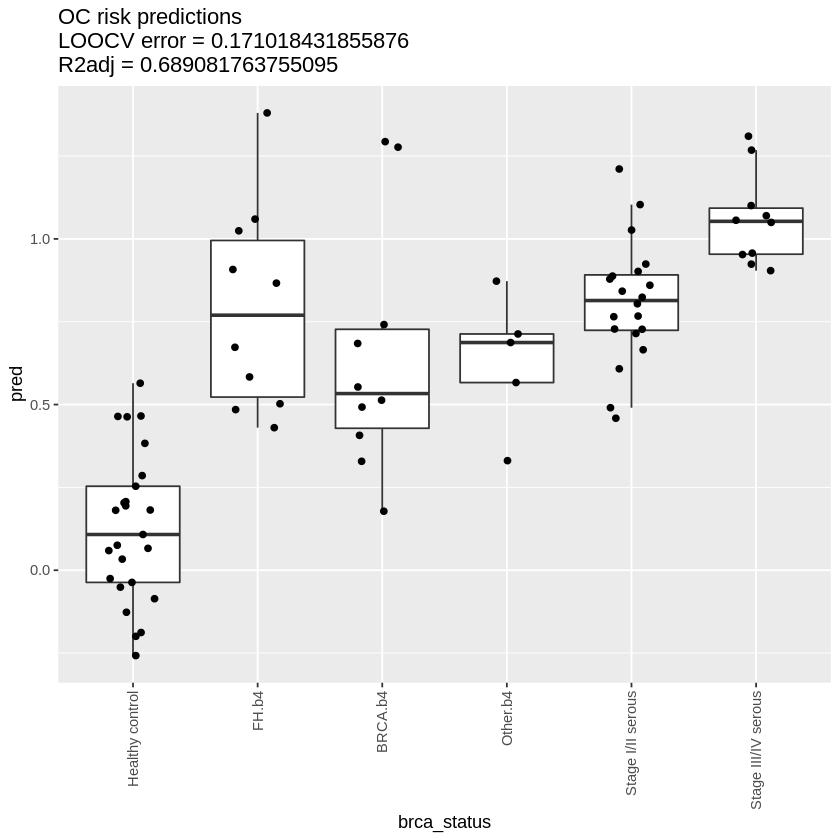

In [ ]:
#Load in the data
df = readRDS("b4_oc_combat.rds")
#Transpose table because glmnet package expects rows as samples, columns as features
df = df %>% t() %>% as.data.frame()

#Get the IDs of samples used to build model
train_samples = ann_df %>% filter(!is.na(score)) %>% pull(sample_id)

#Get table of samples used to build model
train_df = df[(rownames(df) %in% train_samples),]
#Get sample labels
y = ann_df %>% slice(match(rownames(train_df), sample_id)) %>%
    pull(score)
#Add column contianing the labels to table
train_df$y = y

#Build 1st model (LASSO)
mod = build_model(xy=train_df, alpha=1,
                  nfolds = nrow(train_df), family = "gaussian",
                  type.measure = "mse")
#Get the LOOCV error of the model
err = min(mod$cvm)
#Get the features selected by the model
nzc = extract_nzc(mod, lm=mod$lambda.min, family="gaussian")

#Subset the data to only the selected features
train_df = train_df %>% select(one_of(c(nzc, "y")))
#Build 2nd model using the selected features
mod2 <- lm(y ~ ., data = train_df)
#Get the adjusted r-squared of the 2nd model (shows goodness of fit)
r2adj = summary(mod2)$adj.r.squared

#Subset the entire table to only the selected features
test_df = df %>% select(one_of(nzc))
#Use the 2nd model to predict on all samples
pred = predict(
            mod2,
            test_df) %>%
            as.data.frame() %>%
    rownames_to_column(var="sample_id") %>%
    rename("pred"=".")
title = paste("OC risk predictions",
              "\nLOOCV error =", err, "\nR2adj =", r2adj)

#Make boxplot
p = make_boxplot(pred, ann_df, x = "brca_status", y = "pred",
                 title=title) +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))   #Rotate labels for spacing
print(p)